In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import glob
FILES=glob.glob("../../datasets/med_MNIST/AbdomenCT/*jpeg")
FILES1=glob.glob("../../datasets/med_MNIST/AbdomenCT/*jpeg")
FILES2=glob.glob("../../datasets/med_MNIST/BreastMRI/*jpeg")
#FILES

In [87]:
import PIL
import numpy as np
from PIL import Image
from numpy import asarray
# Open the image form working directory
num_train_samples=2000


def getData(FILES1,FILES2,num_train_samples):
    ar_tr = np.zeros([num_train_samples*4,64, 64, 3], dtype=np.uint8)
    label_tr=np.empty((num_train_samples*4,), dtype='uint8')
    ar_ts = np.zeros([num_train_samples*4,64, 64, 3], dtype=np.uint8)
    label_ts=np.empty((num_train_samples*4,), dtype='uint8')
    count=0
    for f in FILES1:
        #print('XX',count)
        image = Image.open(f)
        if count <num_train_samples:
            data = asarray(image)
            ar_tr[count,:,:,1]=data
            ar_tr[count,:,:,2]=data
            ar_tr[count,:,:,0]=data
            label_tr[count]=0
        if count>=num_train_samples:
            data = asarray(image)
            ar_ts[count,:,:,1]=data
            ar_ts[count,:,:,2]=data
            ar_ts[count,:,:,0]=data
            label_ts[count]=0
        count=count+1
        if count==num_train_samples*2:
            break


    count=0
    for f in FILES2:
        #print('XXX',count)
        image = Image.open(f)
        if count <num_train_samples:
            data = asarray(image)
            ar_tr[count+num_train_samples,:,:,1]=data
            ar_tr[count+num_train_samples,:,:,2]=data
            ar_tr[count+num_train_samples,:,:,0]=data
            label_tr[count+num_train_samples]=1
        if count>=num_train_samples:
            data = asarray(image)
            ar_ts[count+num_train_samples,:,:,1]=data
            ar_ts[count+num_train_samples,:,:,2]=data
            ar_ts[count+num_train_samples,:,:,0]=data
            label_ts[count+num_train_samples]=1
        count=count+1
        if count==num_train_samples*2:
            break
    
    x_train=ar_tr
    x_test=ar_ts
    y_train=[0]*num_train_samples*2 + [1]*num_train_samples*2
    y_test=[0]*num_train_samples*2 + [1]*num_train_samples*2
    return (x_train, y_train), (x_test, y_test)

#(train_images, train_labels), (test_images, test_labels)

#(x_train, y_train), (x_test, y_test)=getData(FILES1,FILES2,num_train_samples)

In [88]:
print(len(y_train),len(y_test))
print(x_train.shape,len(y_test))


20000 20000
(20000, 64, 64, 3) 20000


In [89]:
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
(train_images, train_labels), (test_images, test_labels)=getData(FILES1,FILES2,num_train_samples)

In [90]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

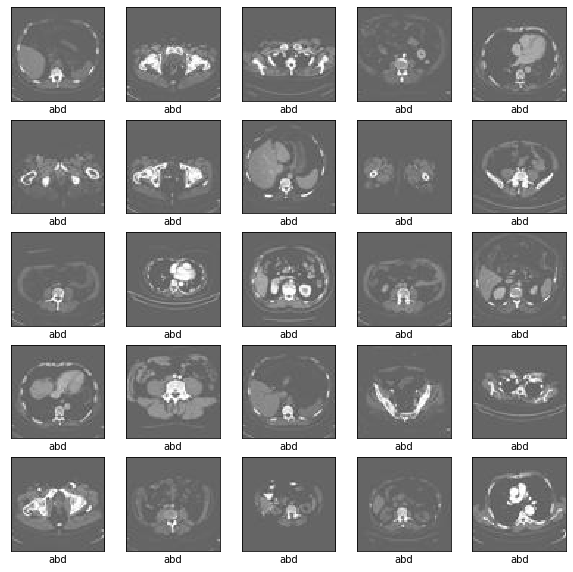

In [91]:
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#               'dog', 'frog', 'horse', 'ship', 'truck']

class_names = ['abd','bst']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [98]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [99]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)        36928     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [101]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

In [102]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels))

Train on 8000 samples, validate on 8000 samples
Epoch 1/3
1824/8000 [=====>........................] - ETA: 18s - loss: 0.1383 - acc: 0.9512

KeyboardInterrupt: 

8000/8000 - 4s - loss: 43.6340 - acc: 0.5000


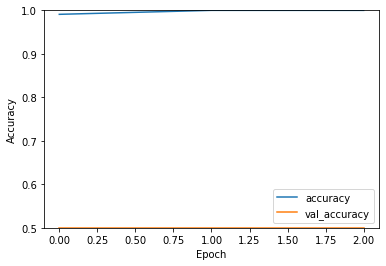

In [97]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
history.history